In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
df=pd.read_csv('Crime_Data_from_2010_to_Present.csv')
df.columns=df.columns.str.strip()
#df.columns=df.columns.str.replace(' ','_')

temp=pd.to_datetime(df['Date Occurred'])
df['Date Occurred']=temp
df['month']=temp.dt.month
df['day']=temp.dt.day
df['year']=temp.dt.year
df.sort_values(by='Date Occurred',ascending=False,inplace=True)
df[['Date Occurred','year','month','day']].reset_index()

lat=[]
lon=[]
df['location_1']=df['Location'].str.strip('()')

for row in df['location_1']:
    try:
        lat.append(row.split(',')[0])
        lon.append(row.split(',')[1])
    except:
        lat.append(np,nan)
        lon.append(np,nan)

df['lat']=lat
df['lon']=lon

df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 4,Address,Cross Street,Location,month,day,year,location_1,lat,lon
920850,192008422,03/30/2019,2019-03-30,120,20.0,Olympic,2079,624,BATTERY - SIMPLE ASSAULT,1242 0416 0446 0561,...,NaN,2200 W PICO BL,NaN,"(34.0473, -118.2842)",3,30,2019,"34.0473, -118.2842",34.0473,-118.2842
920857,192008440,03/30/2019,2019-03-30,725,20.0,Olympic,2029,210,ROBBERY,0216 0325 0334 0387 0432 0945,...,NaN,600 S VIRGIL AV,NaN,"(34.0637, -118.287)",3,30,2019,"34.0637, -118.287",34.0637,-118.287
920856,192008436,03/30/2019,2019-03-30,310,20.0,Olympic,2001,310,BURGLARY,0314 0344 0352 0377 1221 1206 1402 0202,...,NaN,600 N BEACHWOOD DR,NaN,"(34.0817, -118.3217)",3,30,2019,"34.0817, -118.3217",34.0817,-118.3217
920853,192008428,03/30/2019,2019-03-30,10,20.0,Olympic,2023,648,ARSON,0443 1218 2004 2021,...,NaN,6TH,KINGSLEY,"(34.0672, -118.3047)",3,30,2019,"34.0672, -118.3047",34.0672,-118.3047
919848,191607355,03/30/2019,2019-03-30,1300,16.0,Foothill,1619,510,VEHICLE - STOLEN,NaN,...,NaN,11000 TAMBERLY LN,NaN,"(34.2709, -118.2931)",3,30,2019,"34.2709, -118.2931",34.2709,-118.2931


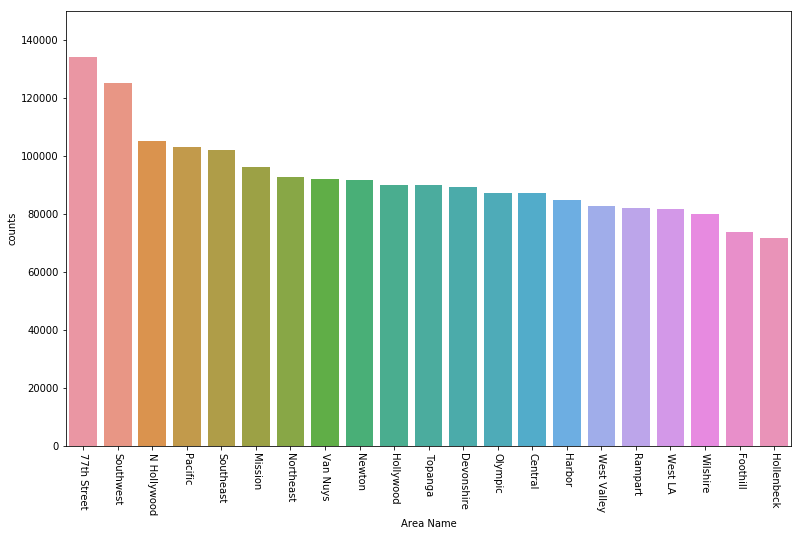

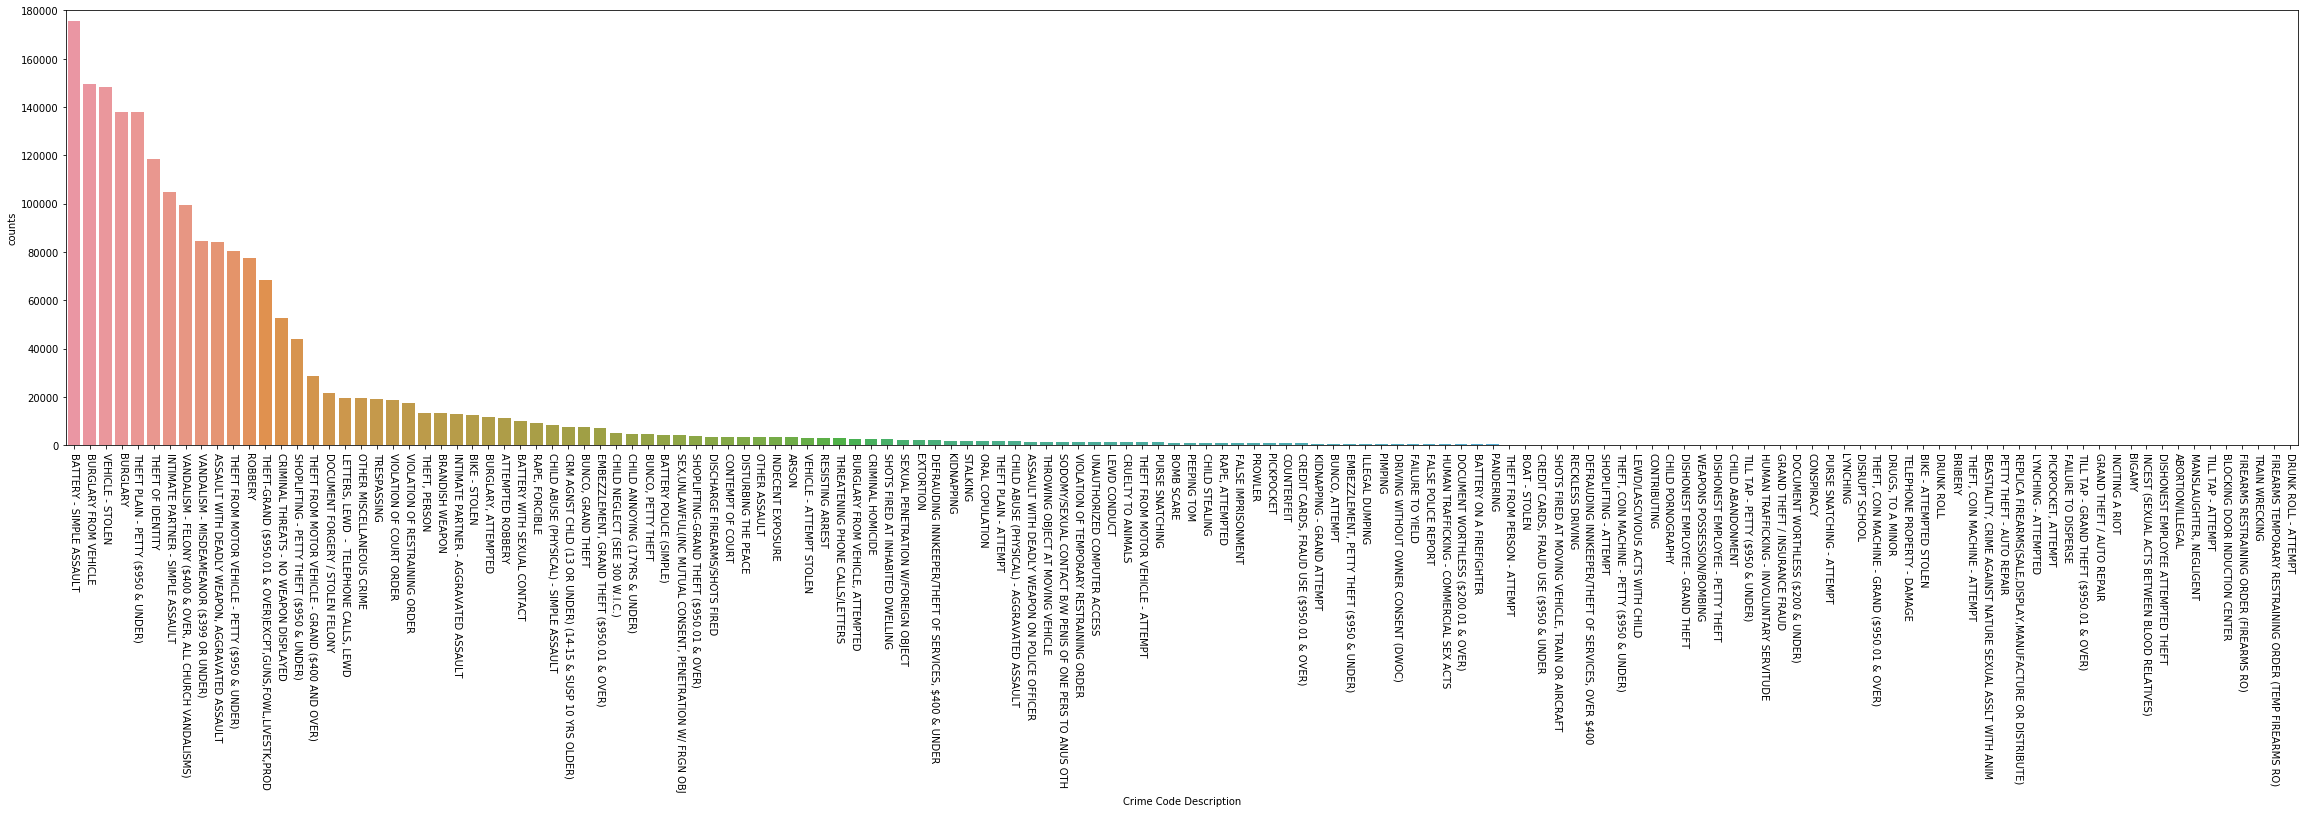

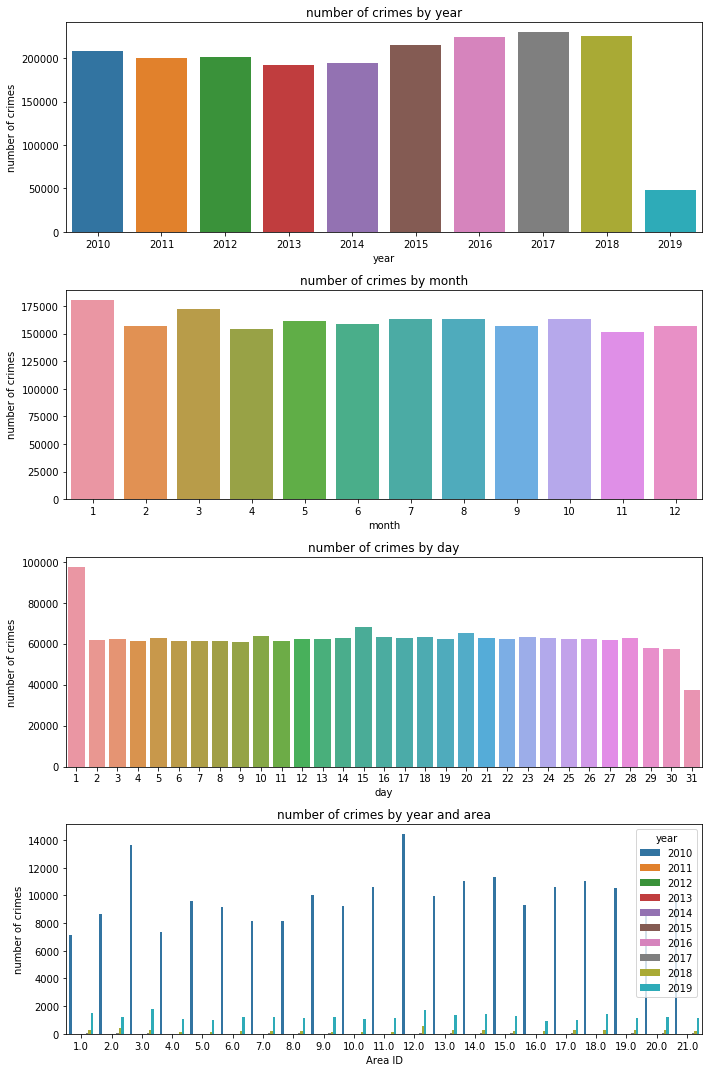

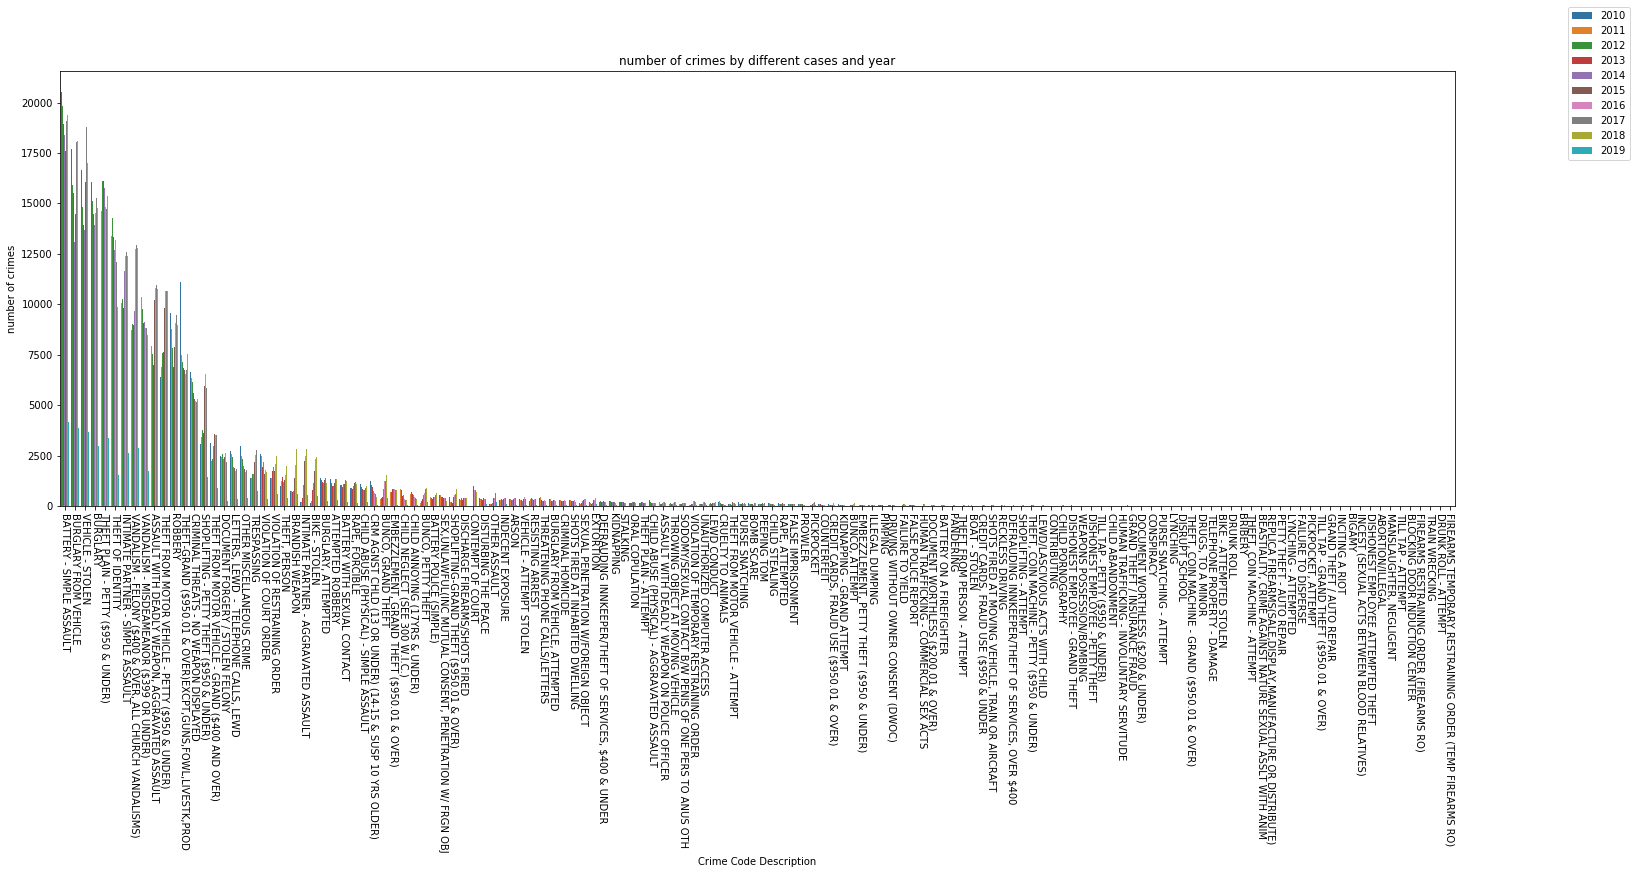

In [3]:
crime_area=pd.DataFrame(df.groupby('Area Name').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count=pd.DataFrame(df.groupby('Crime Code Description').size().sort_values(ascending=False).rename('counts').reset_index())

crime_area=crime_area[['Area Name','counts']]
f,ax=plt.subplots(figsize=(13,8))
fig=sns.barplot(x='Area Name',y='counts',data=crime_area)
fig.axis(ymin=0,ymax=150000)
plt.xticks(rotation=-90)

crime_count=crime_count[['Crime Code Description','counts']]
f,ax=plt.subplots(figsize=(40,8))
fig=sns.barplot(x='Crime Code Description',y='counts',data=crime_count)
fig.axis(ymin=0,ymax=180000)
plt.xticks(rotation=-90)

fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,15))

sns.countplot(x='year',data=df,ax=ax1)
ax1.set_ylabel('number of crimes')
ax1.set_title('number of crimes by year')

sns.countplot(x='month',data=df,ax=ax2)
ax2.set_ylabel('number of crimes')
ax2.set_title('number of crimes by month')

sns.countplot(x='day',data=df,ax=ax3)
ax3.set_ylabel('number of crimes')
ax3.set_title('number of crimes by day')

sns.countplot(x='Area ID',hue='year',data=df,ax=ax4)
ax4.set_ylabel('number of crimes')
ax4.set_title('number of crimes by year and area')

fig.tight_layout()

fig2,ax5=plt.subplots(figsize=(25,8))
index_order=df['Crime Code Description'].value_counts().index
sns.countplot(x='Crime Code Description',hue='year',data=df,order=index_order,ax=ax5)
ax5.set_ylabel('number of crimes')
ax5.set_title('number of crimes by different cases and year')
ax5.set_xticklabels(labels=index_order,rotation=-90)
ax5.legend(bbox_to_anchor=(1,1),bbox_transform=plt.gcf().transFigure)

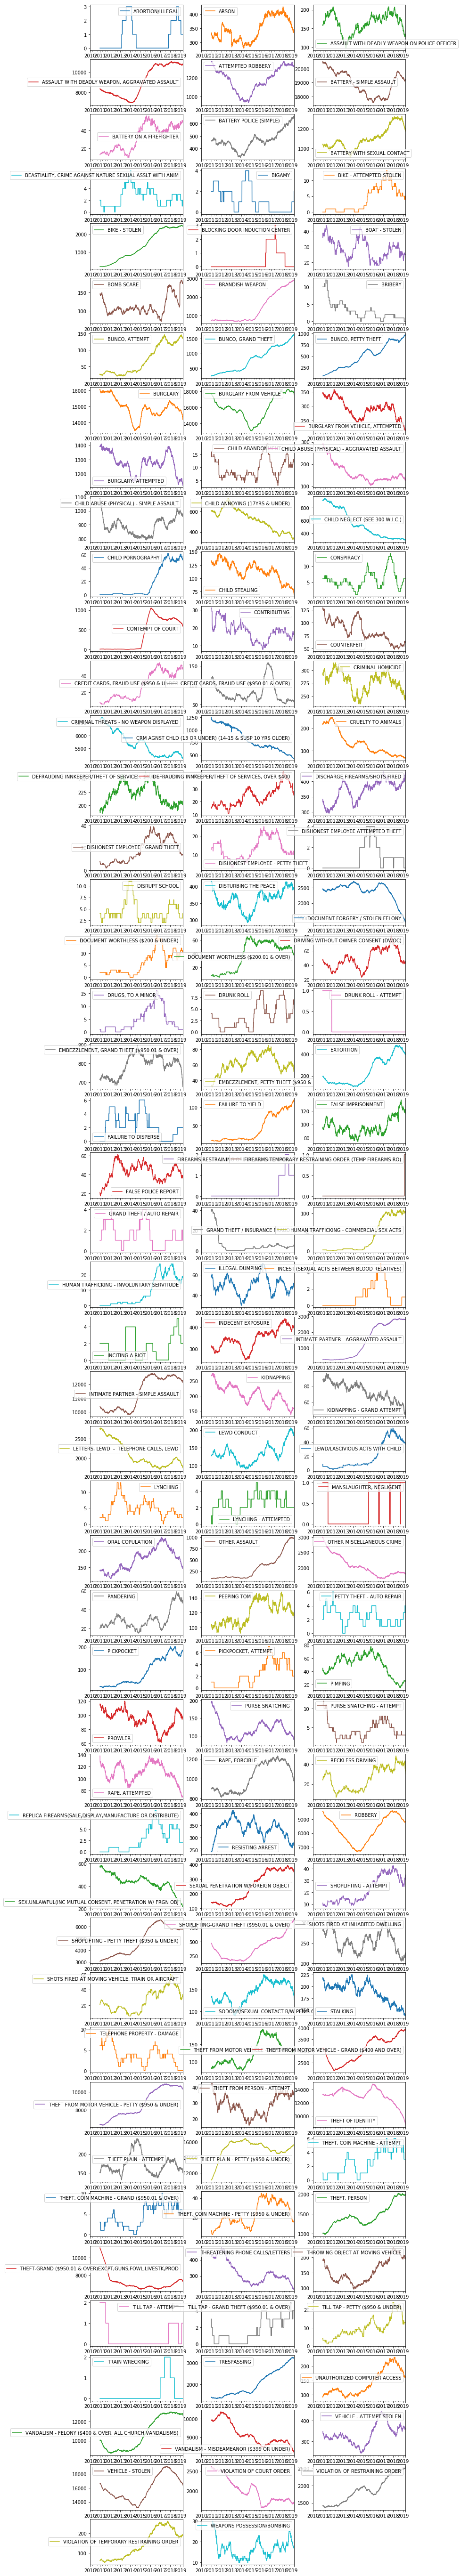

In [4]:
df.index=pd.DatetimeIndex(df['Date Occurred'])
crime_count_date=df.pivot_table('Crime Code',aggfunc=np.size,columns='Crime Code Description',index=df.index.date,fill_value=0)
crime_count_date.index=pd.DatetimeIndex(crime_count_date.index)
plo=crime_count_date.rolling(365).sum().plot(figsize=(12,100),subplots=True,layout=(-1,3),sharex=False,sharey=False)